In [2]:
import xarray as xr
from pathlib import Path

In [3]:
basedir = Path("/home/kristofvt/git/worldcereal-classification/scripts/inference")

cropland_embeddings = xr.open_dataarray(basedir / "presto_test_features.nc")
croptype_embeddings = xr.open_dataarray(basedir / "presto_test_features_croptype.nc")

cropland_embeddings

<xarray.DataArray (bands: 128, y: 100, x: 100)> Size: 5MB
[1280000 values with dtype=float32]
Coordinates:
  * x        (x) float64 800B 6.64e+05 6.64e+05 6.64e+05 ... 6.65e+05 6.65e+05
  * y        (y) float64 800B 5.612e+06 5.612e+06 ... 5.611e+06 5.611e+06
  * bands    (bands) <U13 7kB 'presto_ft_0' 'presto_ft_1' ... 'presto_ft_127'

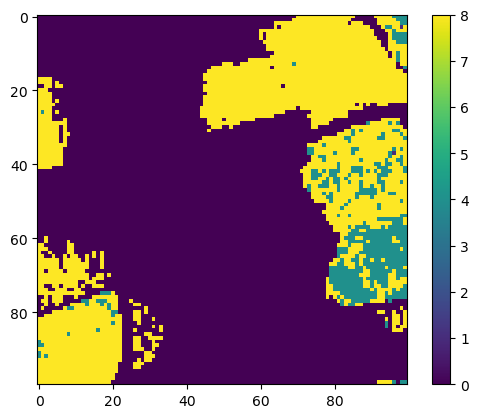

In [13]:
import matplotlib.pyplot as plt

classification = xr.open_dataarray(basedir / "test_classification.nc").values[0, ...]
classification_ct = xr.open_dataarray(
    basedir / "test_classification_croptype.nc"
).values[0, ...]
classification_ct[classification == 0] = 0
plt.imshow(classification_ct)
plt.colorbar()

(-6.0, 6.0)

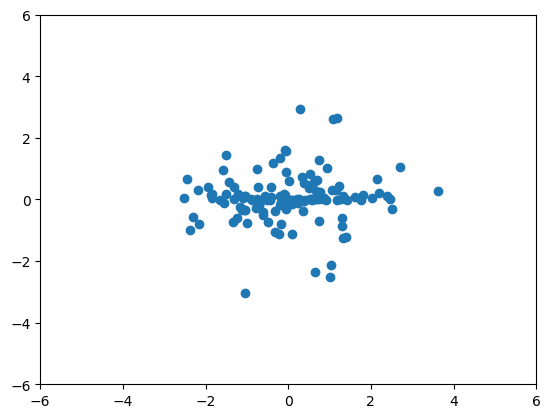

In [12]:
import matplotlib.pyplot as plt

plt.scatter(
    cropland_embeddings.to_array().values[0, :, 0, 0],
    croptype_embeddings.to_array().values[0, :, 0, 0],
)
plt.xlim([-6, 6])
plt.ylim([-6, 6])

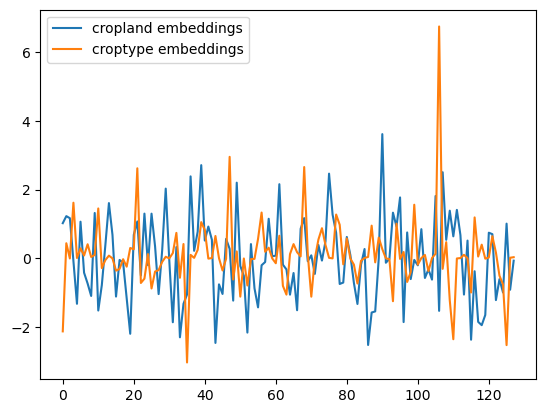

In [17]:
plt.plot(cropland_embeddings.to_array().values[0, :, 0, 0], label="cropland embeddings")
plt.plot(croptype_embeddings.to_array().values[0, :, 0, 0], label="croptype embeddings")
plt.legend()

In [5]:
arr = (
    xr.open_dataset(basedir / "local_presto_inputs.nc")
    .to_array(dim="bands")
    .drop_sel(bands="crs")
    .astype("uint16")
)
arr

<xarray.DataArray (bands: 12, t: 12, y: 100, x: 100)> Size: 3MB
array([[[[  301,   552,   702, ...,   367,   375,   368],
         [  435,   628,   474, ...,   364,   388,   340],
         [  672,   688,   505, ...,   344,   376,   350],
         ...,
         [  343,   337,   356, ...,   366,   359,   374],
         [  342,   360,   339, ...,   326,   313,   357],
         [  345,   347,   321, ...,   339,   312,   320]],

        [[65535, 65535, 65535, ..., 65535, 65535, 65535],
         [65535, 65535, 65535, ..., 65535, 65535, 65535],
         [65535, 65535, 65535, ..., 65535, 65535, 65535],
         ...,
         [65535, 65535, 65535, ..., 65535, 65535, 65535],
         [65535, 65535, 65535, ..., 65535, 65535, 65535],
         [65535, 65535, 65535, ..., 65535, 65535, 65535]],

        [[65535, 65535, 65535, ..., 65535, 65535, 65535],
         [65535, 65535, 65535, ..., 65535, 65535, 65535],
         [65535, 65535, 65535, ..., 65535, 65535, 65535],
         ...,
...
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]],

        [[  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]],

        [[  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]]]], dtype=uint16)
Coordinates:
  * t        (t) datetime64[ns] 96B 2020-11-01 2020-12-01 ... 2021-10-01
  * x        (x) float64 800B 6.64e+05 6.64e+05 6.64e+05 ... 6.65e+05 6.65e+05
  * y        (y) float64 800B 5.612e+06 5.612e+06 ... 5.611e+06 5.611e+06
  * bands    (bands) object 96B 'S2-L2A-B02' 'S2-L2A-B03' ... 'COP-DEM'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform - Geotrellis backend: 0.38.5a1
    description:  
    title:

In [6]:
arr.sel(bands=["COP-DEM"])

<xarray.DataArray (bands: 1, t: 12, y: 100, x: 100)> Size: 240kB
array([[[[  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]],

        [[  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]],

        [[  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         ...,
...
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]],

        [[  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]],

        [[  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         [  144,   146,   146, ...,   172,   172, 65535],
         ...,
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168],
         [  155,   155,   155, ...,   167,   168,   168]]]], dtype=uint16)
Coordinates:
  * t        (t) datetime64[ns] 96B 2020-11-01 2020-12-01 ... 2021-10-01
  * x        (x) float64 800B 6.64e+05 6.64e+05 6.64e+05 ... 6.65e+05 6.65e+05
  * y        (y) float64 800B 5.612e+06 5.612e+06 ... 5.611e+06 5.611e+06
  * bands    (bands) object 8B 'COP-DEM'
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform - Geotrellis backend: 0.38.5a1
    description:  
    title: